In [ ]:
import pysam
import os.path
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

In [9]:
raw_sam_file = '/olympus/WORK/TARPEY/align_to_chinook/pink_to_chinook.SAM'
filtered_sam_file = '/olympus/WORK/TARPEY/align_to_chinook/pink_to_chinook_filtered.SAM.txt'

In [10]:
def get_aligns(sam_file = raw_sam_file):
    return(pysam.AlignmentFile(sam_file, "r").fetch())

### Mapping quality

In [12]:
mpqs = [read.mapping_quality for read in get_aligns()]

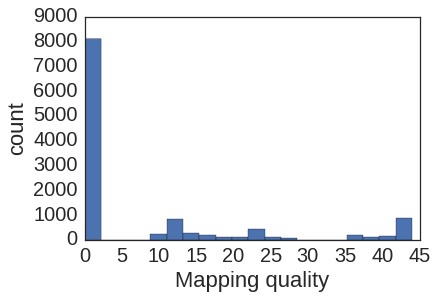

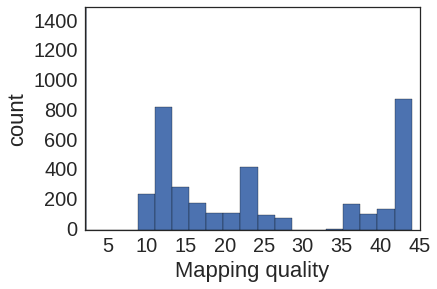

In [15]:
plt.hist(mpqs, bins = 20)
plt.xlabel('Mapping quality')
plt.ylabel('count')
plt.title('')
plt.show()

plt.hist(mpqs, bins = 20)
plt.xlabel('Mapping quality')
plt.ylabel('count')
plt.title('')
plt.xlim(2)
plt.ylim(0, 1500)
plt.show()

### Strand bias

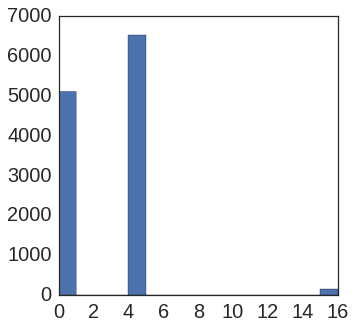

In [16]:
flags  = [read.flag for read in get_aligns()]
figsize(5,5)
plt.hist(flags, bins = 16)
plt.show()

### Alignment lengths

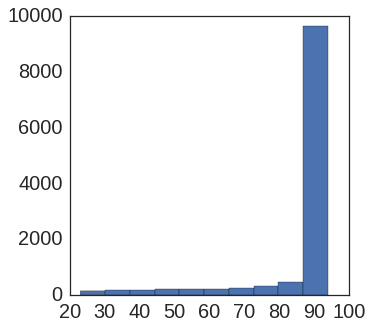

In [17]:
qal =  [read.query_alignment_length for read in get_aligns()]
plt.hist(qal)
plt.show()


In [ ]:
qal


### Edit distances

In [18]:
edit_distances = list()
mq = list()
for read in get_aligns():
    try:
        edit_distances.append(np.int(read.get_tag('XM')))
        mq.append(np.int(read.mapping_quality))
    except KeyError:
        pass

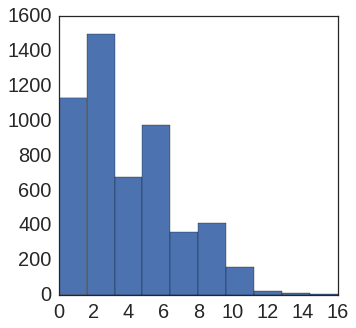

In [19]:
plt.hist(edit_distances)
plt.show()

### Edit distance vs Mapping quality

In [20]:
rr = pd.DataFrame({'ed' : edit_distances, 'mq' : mq })

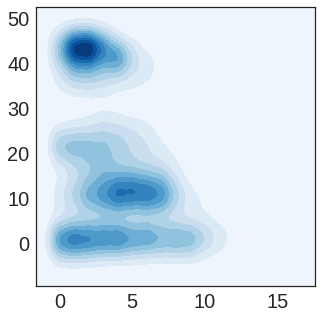

In [21]:
sns.kdeplot(rr, cmap="Blues", shade = True, legend = True)
plt.show()

Lets keep only the alignments with:
(query_alignment_length >= 93) AND (mapping_quality >= 30)

In [31]:
with pysam.AlignmentFile(raw_sam_file, "r") as INFILE:
    with pysam.AlignmentFile(filtered_sam_file, "wh", template=INFILE) as OUTFILE:
        for aln in INFILE:
            if (aln.query_alignment_length >= 94) and (aln.mapping_quality >= 30):
                OUTFILE.write(aln)

In [32]:
filtered_SAM = pd.read_csv(filtered_sam_file, sep = '\t', comment='@', engine='python', 
            names = ['QNAME','FLAG','RNAME','POS','MAPQ','CIGAR','RNEXT','PNEXT','ISIZE','SEQ','QUAL',
                     'TAG1', 'TAG2', 'TAG3' 'TAG4', 'TAG5', 'TAG6', 'TAG7','TAG8', 'TAG9','TAG10'])
filtered_SAM.head()

,QNAME,FLAG,RNAME,POS,MAPQ,CIGAR,RNEXT,PNEXT,ISIZE,SEQ,QUAL,TAG1,TAG2,TAG3TAG4,TAG5,TAG6,TAG7,TAG8,TAG9,TAG10
0,26987,0,34316,1,42,94M,*,0,0,TGCAGGTTCTAAACCTGGATGATAAAGTAGTGATCAACCAGACCAG...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:156,XN:i:0,XM:i:4,XO:i:0,XG:i:0,NM:i:4,MD:Z:10G38G29G5G8,YT:Z:UU,None
1,4655,0,4325,1,38,94M,*,0,0,TGCAGGTGCATACACTACGGTCGTCCTGGATACGAGTGTCTGCTAA...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:148,XS:i:46,XN:i:0,XM:i:5,XO:i:0,XG:i:0,NM:i:5,MD:Z:8A8T6T30C17T20,YT:Z:UU
2,67598,0,21204,1,41,94M,*,0,0,TGCAGGCAGACGATGGGCAACATTTCTGTAAAGGACCATGTGACAC...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:140,XN:i:0,XM:i:6,XO:i:0,XG:i:0,NM:i:6,MD:Z:10A0C23T6T37G8G4,YT:Z:UU,None
3,7325,0,94449,1,44,94M,*,0,0,TGCAGGAGTGCTCATCTGGAATCCCCCTGTCCCAGTCTCCTCTATC...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:164,XN:i:0,XM:i:3,XO:i:0,XG:i:0,NM:i:3,MD:Z:14G21G35A21,YT:Z:UU,None
4,84096,0,79986,1,44,94M,*,0,0,TGCAGGCAGAATCTCAGCCTCACCCCCCTGGGTGTGCCAGTTTGAT...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:172,XN:i:0,XM:i:2,XO:i:0,XG:i:0,NM:i:2,MD:Z:25T64C3,YT:Z:UU,None


In [33]:
filtered_SAM.drop(['POS', 'RNEXT', 'PNEXT', 'ISIZE', 'SEQ','QUAL'], axis=1, inplace=True)
filtered_SAM['RNAME'] = [str(xx) for xx in filtered_SAM['RNAME'] ]
filtered_SAM.head()

,QNAME,FLAG,RNAME,MAPQ,CIGAR,TAG1,TAG2,TAG3TAG4,TAG5,TAG6,TAG7,TAG8,TAG9,TAG10
0,26987,0,34316,42,94M,AS:i:156,XN:i:0,XM:i:4,XO:i:0,XG:i:0,NM:i:4,MD:Z:10G38G29G5G8,YT:Z:UU,None
1,4655,0,4325,38,94M,AS:i:148,XS:i:46,XN:i:0,XM:i:5,XO:i:0,XG:i:0,NM:i:5,MD:Z:8A8T6T30C17T20,YT:Z:UU
2,67598,0,21204,41,94M,AS:i:140,XN:i:0,XM:i:6,XO:i:0,XG:i:0,NM:i:6,MD:Z:10A0C23T6T37G8G4,YT:Z:UU,None
3,7325,0,94449,44,94M,AS:i:164,XN:i:0,XM:i:3,XO:i:0,XG:i:0,NM:i:3,MD:Z:14G21G35A21,YT:Z:UU,None
4,84096,0,79986,44,94M,AS:i:172,XN:i:0,XM:i:2,XO:i:0,XG:i:0,NM:i:2,MD:Z:25T64C3,YT:Z:UU,None


### Now merge with pink and chinook linkage maps

In [34]:
pink_map_file = '/olympus/WORK/TARPEY/align_to_chinook/pink_map_4_alignment.txt'
pink_map = pd.read_csv(pink_map_file, sep = '\t')
pink_map.head()

,Stacks_CatID,NewLG,LepName,Stacks_locus,cM,Paralog
0,37716,1,5281,37716_x1,0.00,yes
1,12365,1,554,12365_x1,1.11,no
2,13197,1,715,13197_x1,1.11,no
3,13820,1,831,13820_x1,1.11,no
4,20190,1,2078,20190_x1,1.11,no


In [37]:
chin_ex = pd.read_excel('/home/ipseg/Desktop/waples/chum_populations/data/ref/chinook/Supplemental Table 1.xlsx')
chin_ex = chin_ex[['Locus', 'Consensus Sequence', 'Chromosome', 'Position (cM)']]
chin_ex['Locus_basename'] = [xx.split('_')[0] for xx in chin_ex['Locus'] ]
chin_ex.head(5)

,Locus,Consensus Sequence,Chromosome,Position (cM),Locus_basename
0,44207_x1,TGCAGGTGTCTGCAAAAAAACACTCCCCTCCCTAGTTCTCCATATG...,Ots01,0.00,44207
1,28051_x1,TGCAGGCACCTGGACAGCCACAAGGAGTCGCTAGATTGTGATGAGC...,Ots01,0.55,28051
2,6689_x1,TGCAGGGAGAAACTTTGTAGTGGGGTGAAAAGAGGGAGAAGCATCG...,Ots01,0.55,6689
3,59778_x1,TGCAGGATATTAATGCAGGTAAGAAGAAATGGCTTTTAAATGTTTT...,Ots01,0.55,59778
4,38781_x1,TGCAGGAAGGGTCCTCTGGTGGACAACAGAACTCCAGGGACTGGAC...,Ots01,0.55,38781


In [38]:
chin_ex.drop_duplicates(subset = ['Locus_basename', 'Consensus Sequence'], inplace = True)

In [39]:
len(set(chin_ex['Locus_basename'])) == len(chin_ex['Locus_basename'])

True

In [40]:
chin_ex.head(5)

,Locus,Consensus Sequence,Chromosome,Position (cM),Locus_basename
0,44207_x1,TGCAGGTGTCTGCAAAAAAACACTCCCCTCCCTAGTTCTCCATATG...,Ots01,0.00,44207
1,28051_x1,TGCAGGCACCTGGACAGCCACAAGGAGTCGCTAGATTGTGATGAGC...,Ots01,0.55,28051
2,6689_x1,TGCAGGGAGAAACTTTGTAGTGGGGTGAAAAGAGGGAGAAGCATCG...,Ots01,0.55,6689
3,59778_x1,TGCAGGATATTAATGCAGGTAAGAAGAAATGGCTTTTAAATGTTTT...,Ots01,0.55,59778
4,38781_x1,TGCAGGAAGGGTCCTCTGGTGGACAACAGAACTCCAGGGACTGGAC...,Ots01,0.55,38781


In [41]:
chin_lgs = pd.merge(filtered_SAM, chin_ex, left_on = 'RNAME' , right_on = 'Locus_basename')
chin_lgs.head()

,QNAME,FLAG,RNAME,MAPQ,CIGAR,TAG1,TAG2,TAG3TAG4,TAG5,TAG6,TAG7,TAG8,TAG9,TAG10,Locus,Consensus Sequence,Chromosome,Position (cM),Locus_basename
0,26987,0,34316,42,94M,AS:i:156,XN:i:0,XM:i:4,XO:i:0,XG:i:0,NM:i:4,MD:Z:10G38G29G5G8,YT:Z:UU,None,34316_x1,TGCAGGTTCTGAACCTGGATGATAAAGTAGTGATCAACCAGACCAG...,Ots19,73.98,34316
1,4655,0,4325,38,94M,AS:i:148,XS:i:46,XN:i:0,XM:i:5,XO:i:0,XG:i:0,NM:i:5,MD:Z:8A8T6T30C17T20,YT:Z:UU,4325_x1,TGCAGGTGAATACACTATGGTCGTTCTGGATACGAGTGTCTGCTAA...,Ots19,73.78,4325
2,67598,0,21204,41,94M,AS:i:140,XN:i:0,XM:i:6,XO:i:0,XG:i:0,NM:i:6,MD:Z:10A0C23T6T37G8G4,YT:Z:UU,None,21204_x1,TGCAGGCAGAACATGGGCAACATTTCTGTAAAGGATCATGTGTCAC...,Ots19,73.98,21204
3,7325,0,94449,44,94M,AS:i:164,XN:i:0,XM:i:3,XO:i:0,XG:i:0,NM:i:3,MD:Z:14G21G35A21,YT:Z:UU,None,94449_x1,TGCAGGAGTGCTCAGCTGGAATCCCCCTGTCCCAGTGTCCTCTATC...,Ots19,66.87,94449
4,84096,0,79986,44,94M,AS:i:172,XN:i:0,XM:i:2,XO:i:0,XG:i:0,NM:i:2,MD:Z:25T64C3,YT:Z:UU,None,79986_x1,TGCAGGCAGAATCTCAGCCTCACCCTCCTGGGTGTGCCAGTTTGAT...,Ots19,65.20,79986


In [43]:
synteny = pd.merge(pink_map, chin_lgs, left_on = 'Stacks_CatID' , right_on = 'QNAME')
synteny.drop_duplicates(subset=['Stacks_CatID'], inplace=True)
synteny.head()

,Stacks_CatID,NewLG,LepName,Stacks_locus,cM,Paralog,QNAME,FLAG,RNAME,MAPQ,...,TAG6,TAG7,TAG8,TAG9,TAG10,Locus,Consensus Sequence,Chromosome,Position (cM),Locus_basename
0,26987,1,3322,26987_x1,1.11,no,26987,0,34316,42,...,XG:i:0,NM:i:4,MD:Z:10G38G29G5G8,YT:Z:UU,None,34316_x1,TGCAGGTTCTGAACCTGGATGATAAAGTAGTGATCAACCAGACCAG...,Ots19,73.98,34316
1,4655,1,6831,4655_x1,1.11,no,4655,0,4325,38,...,XO:i:0,XG:i:0,NM:i:5,MD:Z:8A8T6T30C17T20,YT:Z:UU,4325_x1,TGCAGGTGAATACACTATGGTCGTTCTGGATACGAGTGTCTGCTAA...,Ots19,73.78,4325
2,67598,1,10446,67598_x1,1.11,no,67598,0,21204,41,...,XG:i:0,NM:i:6,MD:Z:10A0C23T6T37G8G4,YT:Z:UU,None,21204_x1,TGCAGGCAGAACATGGGCAACATTTCTGTAAAGGATCATGTGTCAC...,Ots19,73.98,21204
3,7325,1,11247,7325_x1,13.45,no,7325,0,94449,44,...,XG:i:0,NM:i:3,MD:Z:14G21G35A21,YT:Z:UU,None,94449_x1,TGCAGGAGTGCTCAGCTGGAATCCCCCTGTCCCAGTGTCCTCTATC...,Ots19,66.87,94449
4,84096,1,12408,84096_x1,13.45,no,84096,0,79986,44,...,XG:i:0,NM:i:2,MD:Z:25T64C3,YT:Z:UU,None,79986_x1,TGCAGGCAGAATCTCAGCCTCACCCTCCTGGGTGTGCCAGTTTGAT...,Ots19,65.20,79986


In [92]:
synteny_summary = synteny[['Stacks_CatID', 'RNAME','NewLG', 'Paralog','cM', 'Chromosome', 'Position (cM)']].copy()
synteny_summary.rename(columns = {'NewLG':'pink_LG', 'cM':'pink_cM', 'Chromosome':'Ots_LG', 'Position (cM)':'Ots_cM' }, inplace=True)
synteny_summary['Ots_LG'] = [int(xx.split('s')[1]) for xx in synteny_summary['Ots_LG']]
synteny_summary.head()

,Stacks_CatID,RNAME,pink_LG,Paralog,pink_cM,Ots_LG,Ots_cM
0,26987,34316,1,no,1.11,19,73.98
1,4655,4325,1,no,1.11,19,73.78
2,67598,21204,1,no,1.11,19,73.98
3,7325,94449,1,no,13.45,19,66.87
4,84096,79986,1,no,13.45,19,65.20


### Pink ordering

In [93]:
import collections

len_of_pink_LG = pink_map.groupby('NewLG').max()['cM'].to_dict()
len_of_pink_LG = collections.defaultdict(int, len_of_pink_LG)
print "total pink map length: {} cM".format(sum(len_of_pink_LG.values()))

total pink map length: 3109.76 cM


In [94]:
start_pos_of_pink_LG = collections.defaultdict(int)
for LG in range(1,38):
    start_pos_of_pink_LG[LG] = start_pos_of_pink_LG[LG-1] + len_of_pink_LG[LG-1] + 1

### Chinook ordering

In [95]:
matches = pd.DataFrame(synteny_summary.groupby('Ots_LG')['pink_LG'].value_counts())
matches.index.names =['Ots_LG', 'pink_LG']
matches.columns = ['matched_loci']
order_match = matches.reset_index(level=1).groupby(level=0).first()
order_match

,pink_LG,matched_loci
Ots_LG,,
1,6,40
2,18,41
3,9,17
4,4,35
5,12,18
6,2,20
7,3,21
8,23,21
9,16,51


In [96]:
chin_ex['Ots_LG'] = [int(xx.split('s')[1]) for xx in chin_ex['Chromosome'] ]
chin_ex.head()

,Locus,Consensus Sequence,Chromosome,Position (cM),Locus_basename,Ots_LG
0,44207_x1,TGCAGGTGTCTGCAAAAAAACACTCCCCTCCCTAGTTCTCCATATG...,Ots01,0.00,44207,1
1,28051_x1,TGCAGGCACCTGGACAGCCACAAGGAGTCGCTAGATTGTGATGAGC...,Ots01,0.55,28051,1
2,6689_x1,TGCAGGGAGAAACTTTGTAGTGGGGTGAAAAGAGGGAGAAGCATCG...,Ots01,0.55,6689,1
3,59778_x1,TGCAGGATATTAATGCAGGTAAGAAGAAATGGCTTTTAAATGTTTT...,Ots01,0.55,59778,1
4,38781_x1,TGCAGGAAGGGTCCTCTGGTGGACAACAGAACTCCAGGGACTGGAC...,Ots01,0.55,38781,1


In [97]:
len_of_Ots_LG = chin_ex.groupby('Ots_LG').max()['Position (cM)'].to_dict()
len_of_Ots_LG = collections.defaultdict(int, len_of_Ots_LG)
print "total Ots map length: {} cM".format(sum(len_of_Ots_LG.values()))

total Ots map length: 3114.04 cM


In [98]:
start_pos_of_Ots_LG = collections.defaultdict(int)
current_len = 0
Ots_LG_order = order_match.sort(columns=['pink_LG', 'matched_loci']).index.tolist()

for LG in Ots_LG_order:
    start_pos_of_Ots_LG[LG] = current_len
    current_len += len_of_Ots_LG[LG]

/home/ipseg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [99]:
def pink_pos(row):
    return (start_pos_of_pink_LG[row['pink_LG']] + row['pink_cM'])

def Ots_pos(row):
    return (start_pos_of_Ots_LG[row['Ots_LG']] + row['Ots_cM'])

synteny_summary['pink_pos'] = synteny_summary.apply(pink_pos, axis=1)
synteny_summary['Ots_pos'] = synteny_summary.apply(Ots_pos, axis=1)

synteny_summary.head(5)

,Stacks_CatID,RNAME,pink_LG,Paralog,pink_cM,Ots_LG,Ots_cM,pink_pos,Ots_pos
0,26987,34316,1,no,1.11,19,73.98,2.11,73.98
1,4655,4325,1,no,1.11,19,73.78,2.11,73.78
2,67598,21204,1,no,1.11,19,73.98,2.11,73.98
3,7325,94449,1,no,13.45,19,66.87,14.45,66.87
4,84096,79986,1,no,13.45,19,65.20,14.45,65.20


In [100]:
len(synteny_summary)

957

#### As LGs have an arbitrary end with cM = 0, lets pick the ends of each LG that we want to go first.  
This keeps the ordering along the diagonal as much as possible - and highlights deviations from the diagonal.

Within each Ots LG, get the correlation (rho) of cM between it and the pink LG it matches.

In [81]:
import scipy.stats
rho_of_Ots_LG = dict()

for Ots_LG in order_match.index:
    pink_LG = order_match.loc[Ots_LG]['pink_LG']
    print (Ots_LG, pink_LG)
    current_loci = synteny_summary[synteny_summary['Ots_LG'] == Ots_LG]
    current_loci = current_loci[current_loci['pink_LG'] == pink_LG]
    rho, pval = scipy.stats.spearmanr(a =current_loci['pink_pos'], b= current_loci['Ots_pos'])
    rho_of_Ots_LG[Ots_LG] = rho

(1, 6)
(2, 18)
(3, 9)
(4, 4)
(5, 12)
(6, 2)
(7, 3)
(8, 23)
(9, 16)
(10, 22)
(11, 17)
(12, 5)
(13, 24)
(14, 19)
(15, 25)
(16, 3)
(17, 14)
(18, 14)
(19, 1)
(20, 11)
(21, 13)
(22, 10)
(23, 15)
(24, 11)
(25, 7)
(26, 1)
(27, 26)
(28, 8)
(29, 7)
(30, 2)
(31, 9)
(32, 18)
(33, 20)
(34, 24)


### if this correlation is negative, invert the order of the loci in the chinook chromosome to match chum order

In [101]:
Ots_LGs_to_switch = [key for (key, val) in rho_of_Ots_LG.items() if val < 0]

In [102]:
def CLEAN_Ots_pos(row):
    if row['Ots_LG'] in Ots_LGs_to_switch:
        new_pos = row['Ots_pos'] - row['Ots_cM'] + len_of_Ots_LG[row['Ots_LG']] - row['Ots_cM']
        return(new_pos)
    else:
        return(row['Ots_pos'])

In [103]:
synteny_summary['CLEAN_Ots_pos'] = synteny_summary.apply(CLEAN_Ots_pos, axis = 1)

### Oxford Grid
sort the DataFrame, so that coloring by LG works correctly

In [104]:
synteny_summary = synteny_summary.sort(columns = ['pink_LG', 'pink_cM'])
xx_breaks = start_pos_of_pink_LG.values()[1:]
#yy_breaks = start_pos_of_Ots_LG.values()
yy_breaks = sorted(start_pos_of_Ots_LG.values()) # here sorted by cM , we will need to re-sort back in original order to place LG labels

/home/ipseg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [105]:
xx_lab_loc = []
for idx, xx in enumerate(xx_breaks):
    try:
        xx_lab_loc.append((xx + xx_breaks[idx+1])/2.)
    except IndexError:
        xx_lab_loc.append(xx_breaks[idx]+50)
        
yy_lab_loc = []
for idx, yy in enumerate(yy_breaks):
    try:
        yy_lab_loc.append((yy + yy_breaks[idx+1])/2.)
    except IndexError:
        yy_lab_loc.append(yy_breaks[idx]+50)
        
# yy_breaks is not working - ordering is not 1.2.3...

Plotting setup

In [110]:
colors = sns.color_palette("Set1", 5)
#colors = sns.color_palette("colorblind", 4)
#colors = sns.color_palette("muted", 5)
#colors = sns.color_palette("Set3", 5)

In [111]:
sns.set_context("poster")
sns.set(font_scale=1.7)
#sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

## Draw the Oxford Grid

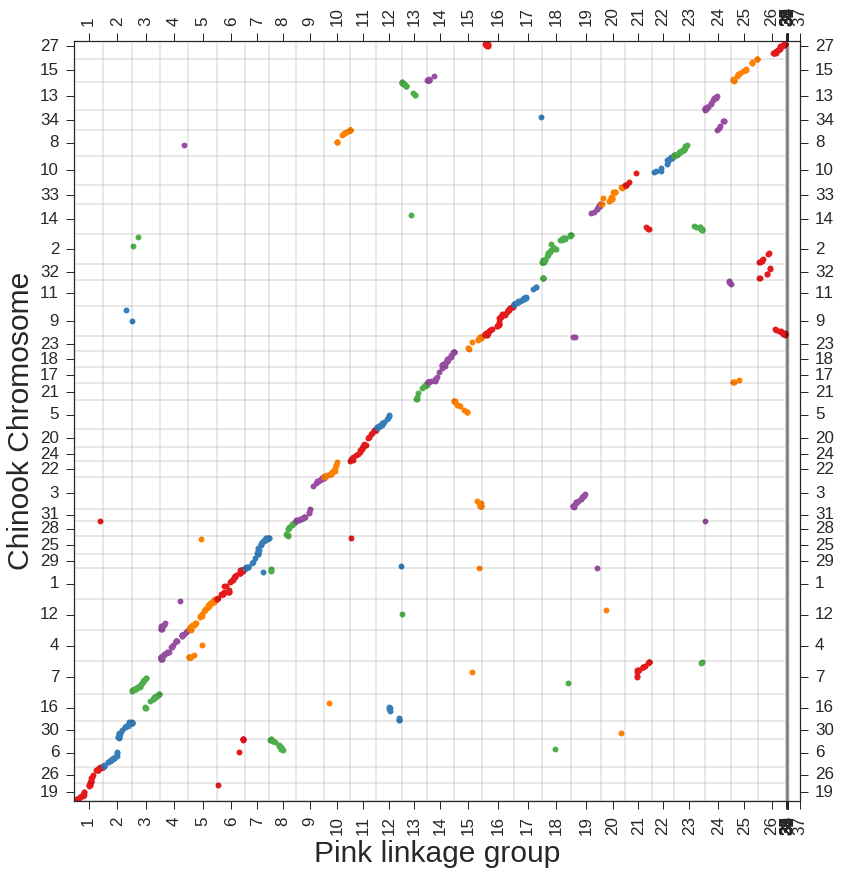

In [112]:
sns.lmplot('pink_pos', 'CLEAN_Ots_pos', data = synteny_summary, fit_reg = False, hue = 'pink_LG', legend = False,
           palette=colors, size = 12, scatter_kws = {'alpha':1, 's':35})
# plot limits
plt.xlim(0, synteny_summary['pink_pos'].max()+10)
plt.ylim(0, synteny_summary['Ots_pos'].max()+10)

# lines delimiting linkage groups
plt.vlines(xx_breaks, ymin = 0, ymax = synteny_summary['Ots_pos'].max(), alpha = .1)
plt.hlines(yy_breaks, xmin = 0, xmax = synteny_summary['pink_pos'].max(), alpha = .1)

# labels for x,y ticks and axes
plt.xticks(xx_lab_loc, range(1,38))

#labels for chinook LGs  
y_tick_labels = [yy[0] for yy in sorted(start_pos_of_Ots_LG.items(), key =lambda foo: foo[1])]

plt.yticks(yy_lab_loc, y_tick_labels)
plt.xlabel('Pink linkage group', fontsize=30)
plt.ylabel('Chinook Chromosome', fontsize=30)

# add tick to top and side
plt.tick_params(labeltop="on", top = True)
plt.tick_params(labelright="on", right = True)
sns.despine(top=False, right=False, left=False, bottom=False)

#rotate xticks
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


# save figure as png
plt.savefig('/olympus/WORK/TARPEY/align_to_chinook/pink_to_chinook_OXFORD.png')
plt.show()

In [117]:
duplicate_colors = colors = sns.xkcd_palette(['blue','orange red' ])

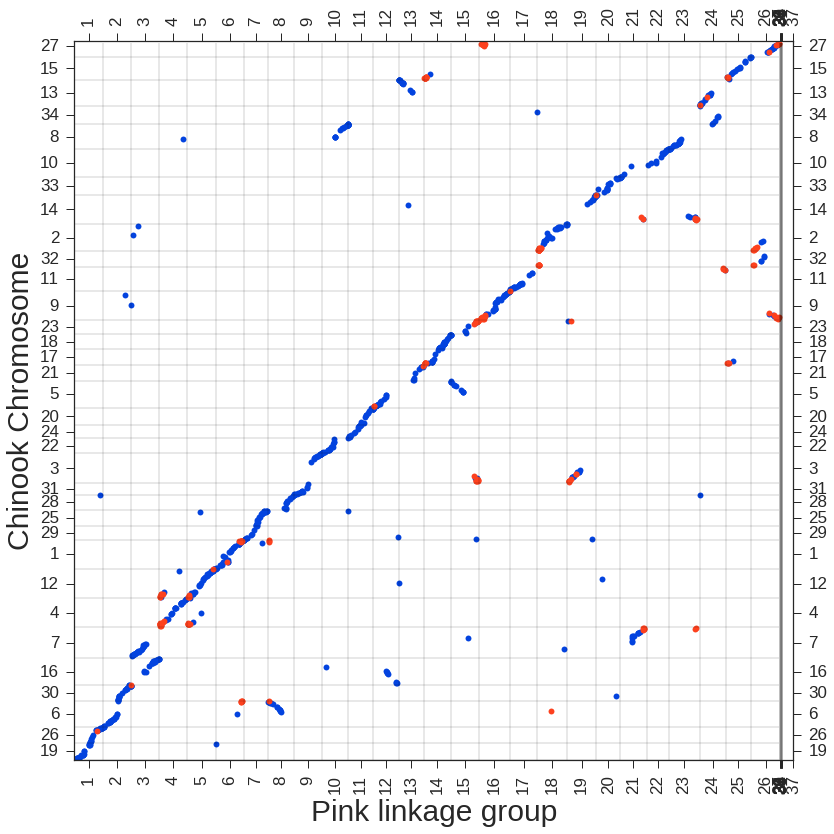

In [118]:
err = sns.lmplot('pink_pos', 'CLEAN_Ots_pos', data = synteny_summary, fit_reg = False, hue = 'Paralog', legend = False,
           palette=duplicate_colors, size = 12, scatter_kws = {'alpha':1, 's':35})
# plot limits
plt.xlim(0, synteny_summary['pink_pos'].max()+10)
plt.ylim(0, synteny_summary['Ots_pos'].max()+10)

# lines delimiting linkage groups
plt.vlines(xx_breaks, ymin = 0, ymax = synteny_summary['Ots_pos'].max(), alpha = .1)
plt.hlines(yy_breaks, xmin = 0, xmax = synteny_summary['pink_pos'].max(), alpha = .1)

# labels for x,y ticks and axes
plt.xticks(xx_lab_loc, range(1,38))

#labels for chinook LGs  
y_tick_labels = [yy[0] for yy in sorted(start_pos_of_Ots_LG.items(), key =lambda foo: foo[1])]

plt.yticks(yy_lab_loc, y_tick_labels)
plt.xlabel('Pink linkage group', fontsize=30)
plt.ylabel('Chinook Chromosome', fontsize=30)

# add tick to top and side
plt.tick_params(labeltop="on", top = True)
plt.tick_params(labelright="on", right = True)
sns.despine(top=False, right=False, left=False, bottom=False)

#rotate xticks
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

# adjust spacing at top
#err.fig.subplots_adjust(top=.6, left=.1, bottom =0)
err.fig.tight_layout()
# save figure as png
plt.savefig('/olympus/WORK/TARPEY/align_to_chinook/pink_to_chinook_OXFORD_duplicates.png')
plt.show()

# without paralogs 

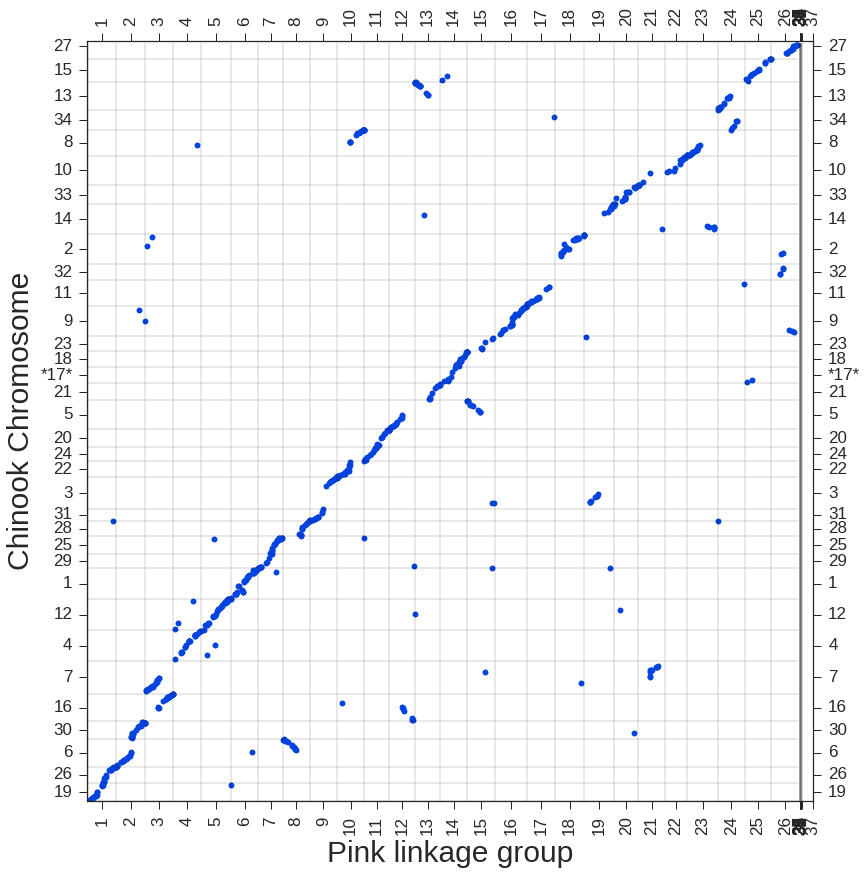

In [121]:
sns.lmplot('pink_pos', 'CLEAN_Ots_pos', data = synteny_summary[synteny_summary['Paralog']=='no'], fit_reg = False, hue = 'Paralog', legend = False,
           palette=sns.xkcd_palette(['blue']), size = 12, scatter_kws = {'alpha':1, 's':35})
# plot limits
plt.xlim(0, synteny_summary['pink_pos'].max()+10)
plt.ylim(0, synteny_summary['Ots_pos'].max()+10)

# lines delimiting linkage groups
plt.vlines(xx_breaks, ymin = 0, ymax = synteny_summary['Ots_pos'].max(), alpha = .1)
plt.hlines(yy_breaks, xmin = 0, xmax = synteny_summary['pink_pos'].max(), alpha = .1)

# labels for x,y ticks and axes
plt.xticks(xx_lab_loc, range(1,38))

#labels for chinook LGs  
y_tick_labels = [yy[0] for yy in sorted(start_pos_of_Ots_LG.items(), key =lambda foo: foo[1])]
y_tick_labels = [yy if yy != 17 else '*17*' for yy in y_tick_labels]

plt.yticks(yy_lab_loc, y_tick_labels)
plt.xlabel('Pink linkage group', fontsize=30)
plt.ylabel('Chinook Chromosome', fontsize=30)

# add tick to top and side
plt.tick_params(labeltop="on", top = True)
plt.tick_params(labelright="on", right = True)
sns.despine(top=False, right=False, left=False, bottom=False)

#rotate xticks
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

# adjust spacing at top
#err.fig.subplots_adjust(top=.6, left=.1, bottom =0)
err.fig.tight_layout()
# save figure as png
plt.savefig('/olympus/WORK/TARPEY/align_to_chinook/pink_to_chinook_OXFORD_NOduplicates.png')
plt.show()

(-1, 27)

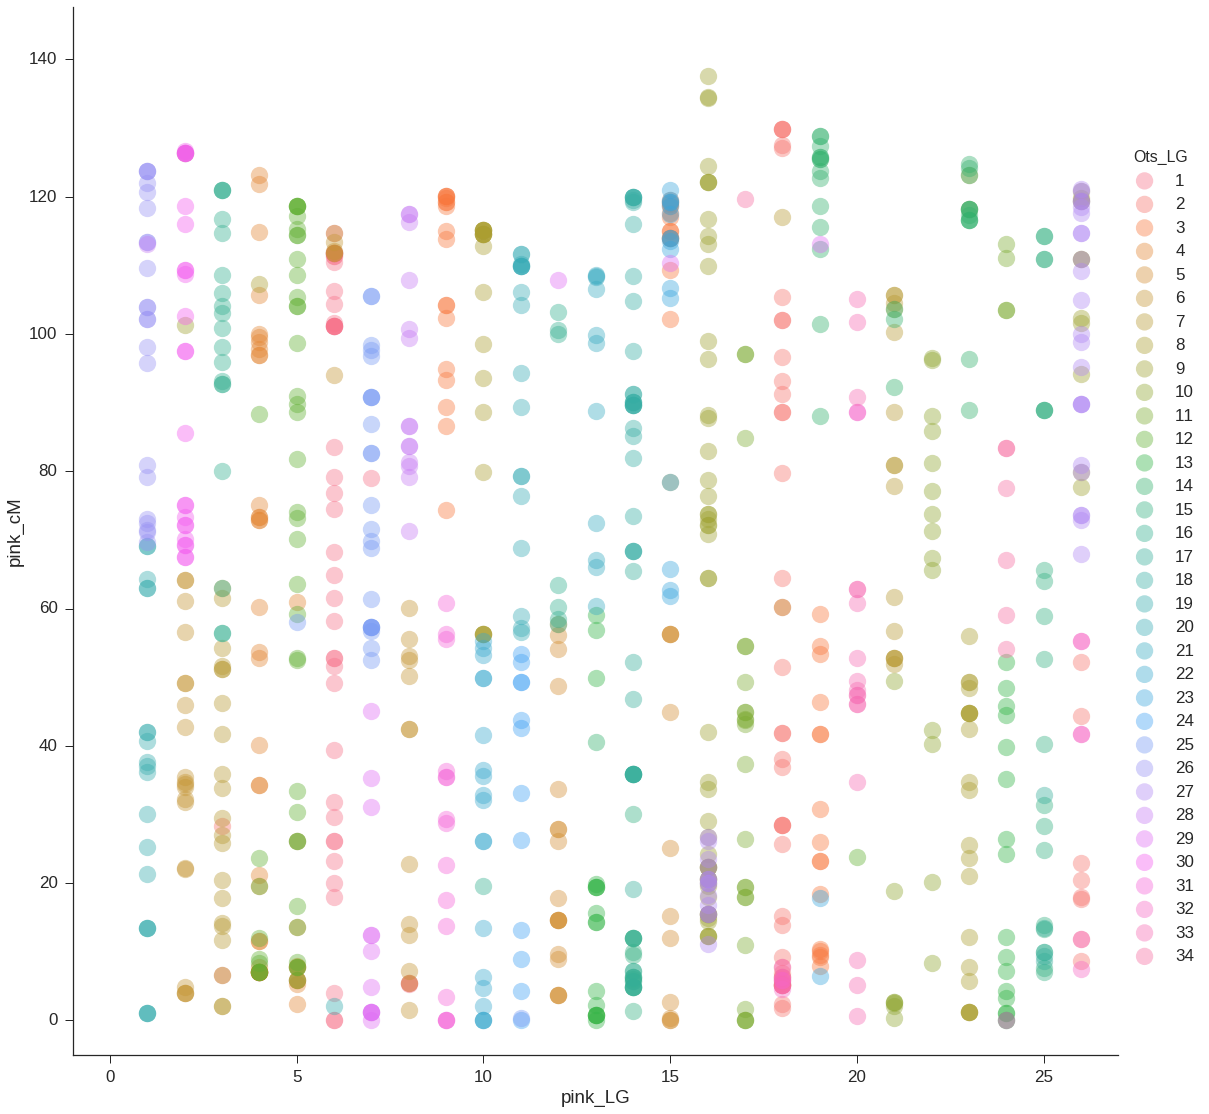

In [122]:
sns.lmplot('pink_LG', 'pink_cM', data = synteny_summary, fit_reg = False, hue = 'Ots_LG', legend = True,
           #palette=sns.color_palette("Set1", 34), 
           palette = sns.color_palette("husl",34 ),
           size = 16, scatter_kws = {'alpha':.4, 's':300})

plt.ylim(-5, synteny_summary['pink_cM'].max()+10)
plt.xlim(-1, synteny_summary['pink_LG'].max()+1)

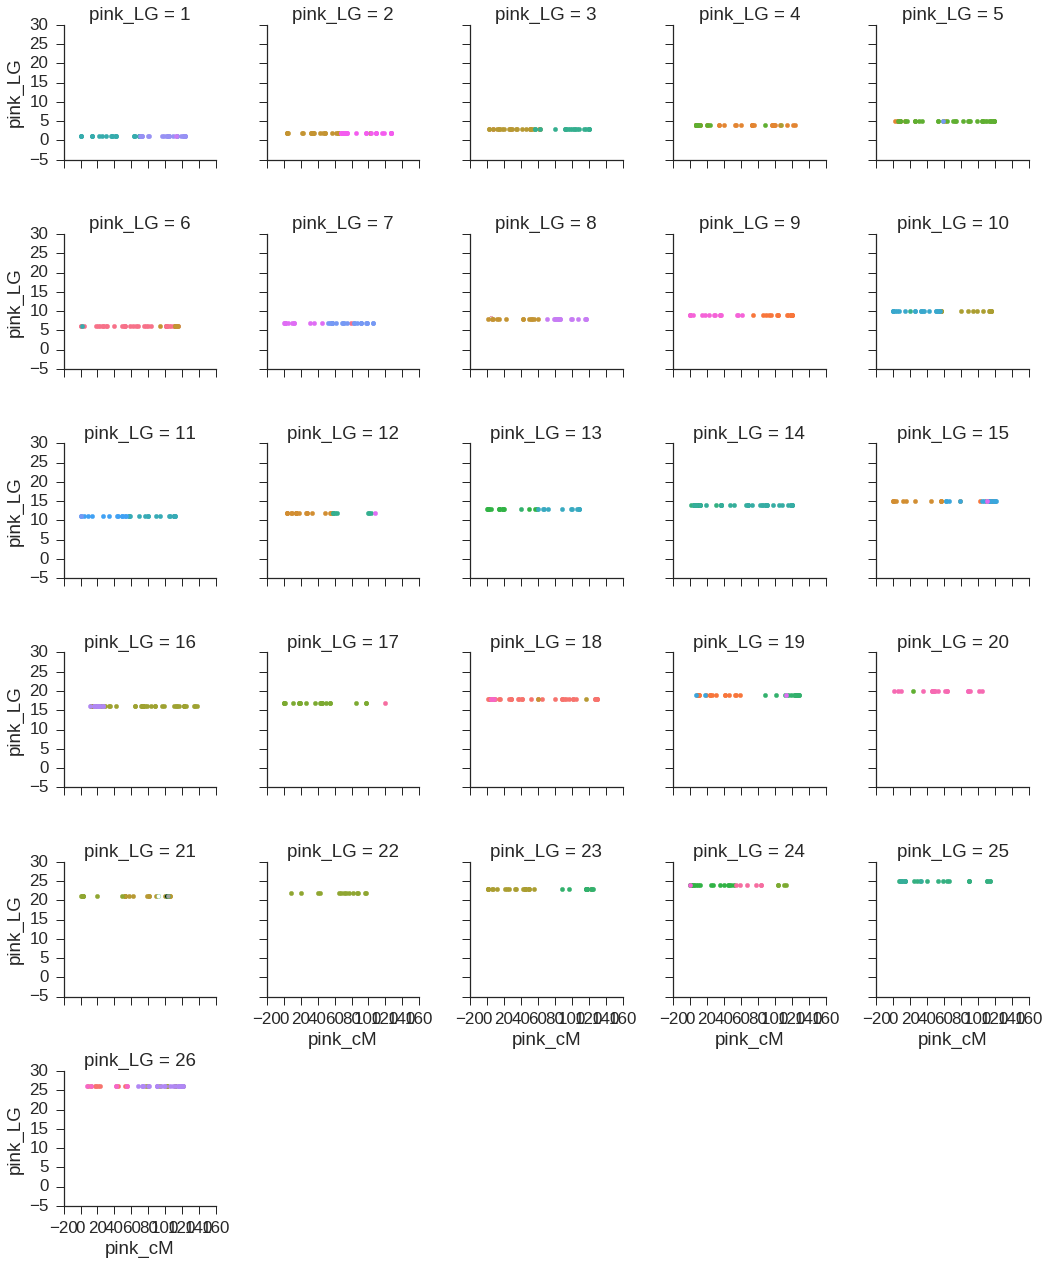

In [123]:
g = sns.FacetGrid(synteny_summary, col="pink_LG", hue = 'Ots_LG', col_wrap=5)
g = g.map(plt.scatter, 'pink_cM', 'pink_LG')

In [128]:
LG_vs_CHR = pd.crosstab(synteny['NewLG'], columns = synteny['Chromosome'])
LG_vs_CHR.index.name = 'Pink LG'

In [130]:
LG_vs_CHR

Chromosome,Ots01,Ots02,Ots03,Ots04,Ots05,Ots06,Ots07,Ots08,Ots09,Ots10,...,Ots25,Ots26,Ots27,Ots28,Ots29,Ots30,Ots31,Ots32,Ots33,Ots34
Pink LG,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,22,0,1,0,0,0,0,0,0
2,0,0,0,0,0,20,0,0,2,0,...,0,0,0,0,0,24,0,0,0,0
3,0,2,0,0,0,0,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,35,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,11,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,40,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,23,0,0,0,12,0,0,0,0,0
8,3,0,0,0,0,13,0,0,0,0,...,0,0,0,14,0,0,0,0,0,0
9,0,0,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0


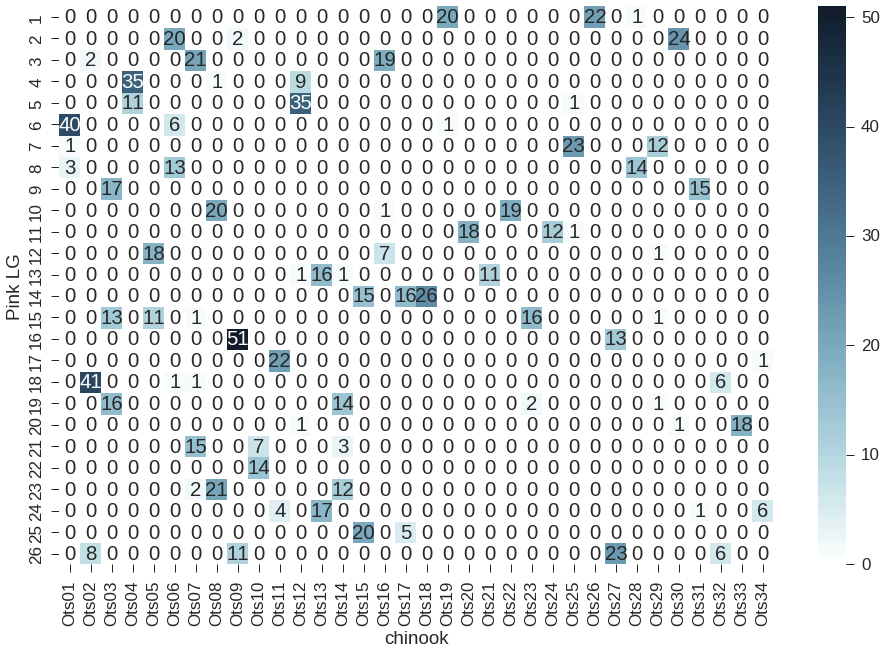

In [131]:
figsize(16,10)
my_colors = sns.cubehelix_palette(n_colors = 6, light=1, start = 2.8, rot = -.1, gamma = 1.2, as_cmap=True)
sns.heatmap(LG_vs_CHR, annot = True, linewidths = 0,square = False, cmap=my_colors, 
           cbar_kws={"orientation": "vertical"})
plt.xlabel('chinook')
plt.show()